In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
import sys
import matplotlib.pyplot as plt
import datetime

In [2]:
train_data_path = './data/train/'
val_data_path = './data/validation/'
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
save_best = tf.keras.callbacks.ModelCheckpoint(filepath="./model/",save_weights_only=False,monitor="val_accuracy", mode="max", save_best_only=True)

In [3]:
x = cv2.imread('./data/train/angry/0.jpg')

In [4]:
x.shape

(48, 48, 3)

In [5]:
t_data = tf.keras.preprocessing.image.ImageDataGenerator()

v_data = tf.keras.preprocessing.image.ImageDataGenerator()

train_datagen = t_data.flow_from_directory(train_data_path,
                                            target_size=(48,48),
                                            batch_size=32)
val_datagen = v_data.flow_from_directory(val_data_path,
                                            target_size=(48,48),
                                            batch_size=32)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [6]:
num_classes = len(os.listdir('./data/train/')) -1

In [7]:
def build_model(num_classes):
    mobilenet = tf.keras.applications.mobilenet.MobileNet(weights='imagenet', include_top=False,input_shape=(48,48,3)) #resnet50.ResNet50(weights='imagenet', include_top=False,input_shape=(48,48,3))
    
    for layers in mobilenet.layers:
        layers.trainable = True

    inputs = tf.keras.layers.Input(shape=(48,48,3))
    x = mobilenet(inputs)
    x = tf.keras.layers.Flatten()(x)
    outputs = tf.keras.layers.Dense(num_classes,activation='softmax')(x)

    model = tf.keras.models.Model(inputs,outputs)

    return model

In [8]:
model = build_model(num_classes)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1, 1, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 7)                 7175      
                                                                 
Total params: 3,236,039
Trainable params: 3,214,151
Non-trainable params: 21,888
_________________________________________________________________


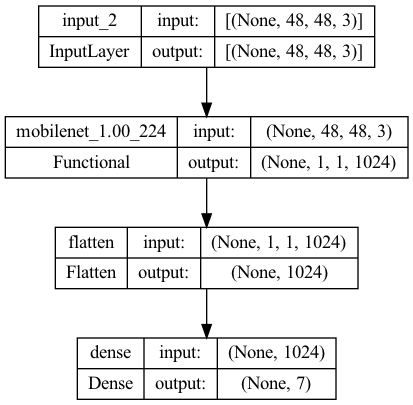

In [9]:
tf.keras.utils.plot_model(model,to_file='model_arch.png', show_shapes=True,show_layer_names=True)

In [10]:
history = model.fit(train_datagen, 
            epochs=100,
            validation_data=val_datagen,
            callbacks=[tensorboard_callback,save_best])

Epoch 1/100


2023-03-16 21:19:11.486363: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


901/901 [==============================] - ETA: 0s - loss: 1.6652 - accuracy: 0.4126

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


901/901 [==============================] - 79s 86ms/step - loss: 1.6652 - accuracy: 0.4126 - val_loss: 1.4132 - val_accuracy: 0.4791
Epoch 2/100
901/901 [==============================] - 74s 82ms/step - loss: 1.3788 - accuracy: 0.4898 - val_loss: 1.3861 - val_accuracy: 0.4747
Epoch 3/100
901/901 [==============================] - 78s 86ms/step - loss: 1.4059 - accuracy: 0.4844 - val_loss: 1.3956 - val_accuracy: 0.4761
Epoch 4/100
901/901 [==============================] - 77s 85ms/step - loss: 1.3453 - accuracy: 0.5029 - val_loss: 2.0670 - val_accuracy: 0.3951
Epoch 5/100
901/901 [==============================] - 79s 88ms/step - loss: 1.3965 - accuracy: 0.4858 - val_loss: 1.5034 - val_accuracy: 0.4370
Epoch 6/100
901/901 [==============================] - 80s 89ms/step - loss: 1.3617 - accuracy: 0.4983 - val_loss: 1.4448 - val_accuracy: 0.4583
Epoch 7/100
901/901 [==============================] - 81s 90ms/step - loss: 1.3235 - accuracy: 0.5131 - val_loss: 1.3970 - val_accuracy: 0.47

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


901/901 [==============================] - 89s 98ms/step - loss: 1.3424 - accuracy: 0.5090 - val_loss: 1.4165 - val_accuracy: 0.5014
Epoch 9/100
901/901 [==============================] - ETA: 0s - loss: 1.2421 - accuracy: 0.5389

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


901/901 [==============================] - 89s 99ms/step - loss: 1.2421 - accuracy: 0.5389 - val_loss: 1.1958 - val_accuracy: 0.5463
Epoch 10/100
901/901 [==============================] - 81s 89ms/step - loss: 1.3332 - accuracy: 0.5127 - val_loss: 1.3181 - val_accuracy: 0.5059
Epoch 11/100
901/901 [==============================] - 79s 88ms/step - loss: 1.2947 - accuracy: 0.5254 - val_loss: 1.2908 - val_accuracy: 0.5130
Epoch 12/100
901/901 [==============================] - ETA: 0s - loss: 1.2139 - accuracy: 0.5499

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


901/901 [==============================] - 91s 101ms/step - loss: 1.2139 - accuracy: 0.5499 - val_loss: 1.1772 - val_accuracy: 0.5509
Epoch 13/100
901/901 [==============================] - 81s 90ms/step - loss: 1.1533 - accuracy: 0.5669 - val_loss: 1.2153 - val_accuracy: 0.5430
Epoch 14/100
901/901 [==============================] - ETA: 0s - loss: 1.1136 - accuracy: 0.5862

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


901/901 [==============================] - 92s 102ms/step - loss: 1.1136 - accuracy: 0.5862 - val_loss: 1.1249 - val_accuracy: 0.5767
Epoch 15/100
901/901 [==============================] - ETA: 0s - loss: 1.0366 - accuracy: 0.6141

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


901/901 [==============================] - 90s 100ms/step - loss: 1.0366 - accuracy: 0.6141 - val_loss: 1.1695 - val_accuracy: 0.5798
Epoch 16/100
901/901 [==============================] - 79s 87ms/step - loss: 1.0369 - accuracy: 0.6207 - val_loss: 1.1504 - val_accuracy: 0.5647
Epoch 17/100
901/901 [==============================] - ETA: 0s - loss: 0.9862 - accuracy: 0.6386

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


901/901 [==============================] - 86s 95ms/step - loss: 0.9862 - accuracy: 0.6386 - val_loss: 1.0923 - val_accuracy: 0.5899
Epoch 18/100
901/901 [==============================] - 79s 88ms/step - loss: 1.0728 - accuracy: 0.6139 - val_loss: 1.3334 - val_accuracy: 0.5146
Epoch 19/100
901/901 [==============================] - 79s 88ms/step - loss: 1.0904 - accuracy: 0.6028 - val_loss: 1.1842 - val_accuracy: 0.5566
Epoch 20/100
901/901 [==============================] - 77s 85ms/step - loss: 1.0513 - accuracy: 0.6157 - val_loss: 1.1351 - val_accuracy: 0.5723
Epoch 21/100
901/901 [==============================] - 77s 85ms/step - loss: 0.9985 - accuracy: 0.6317 - val_loss: 1.1882 - val_accuracy: 0.5596
Epoch 22/100
901/901 [==============================] - 77s 85ms/step - loss: 0.9547 - accuracy: 0.6478 - val_loss: 1.0952 - val_accuracy: 0.5865
Epoch 23/100
901/901 [==============================] - 78s 86ms/step - loss: 0.9411 - accuracy: 0.6547 - val_loss: 1.1041 - val_accuracy

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


901/901 [==============================] - 85s 95ms/step - loss: 0.8763 - accuracy: 0.6818 - val_loss: 1.1216 - val_accuracy: 0.5927
Epoch 27/100
901/901 [==============================] - 75s 84ms/step - loss: 0.8493 - accuracy: 0.6915 - val_loss: 1.1645 - val_accuracy: 0.5759
Epoch 28/100
901/901 [==============================] - ETA: 0s - loss: 0.8067 - accuracy: 0.7054

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


901/901 [==============================] - 85s 94ms/step - loss: 0.8067 - accuracy: 0.7054 - val_loss: 1.1208 - val_accuracy: 0.5968
Epoch 29/100
901/901 [==============================] - 81s 90ms/step - loss: 0.7429 - accuracy: 0.7294 - val_loss: 1.1471 - val_accuracy: 0.5910
Epoch 30/100
901/901 [==============================] - ETA: 0s - loss: 0.6707 - accuracy: 0.7581

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


901/901 [==============================] - 87s 97ms/step - loss: 0.6707 - accuracy: 0.7581 - val_loss: 1.1252 - val_accuracy: 0.6078
Epoch 31/100
901/901 [==============================] - ETA: 0s - loss: 0.6009 - accuracy: 0.7855

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


901/901 [==============================] - 83s 92ms/step - loss: 0.6009 - accuracy: 0.7855 - val_loss: 1.1962 - val_accuracy: 0.6090
Epoch 32/100
901/901 [==============================] - 76s 84ms/step - loss: 0.5344 - accuracy: 0.8087 - val_loss: 1.2194 - val_accuracy: 0.6022
Epoch 33/100
901/901 [==============================] - 78s 87ms/step - loss: 0.4638 - accuracy: 0.8383 - val_loss: 1.2855 - val_accuracy: 0.6018
Epoch 34/100
901/901 [==============================] - 79s 87ms/step - loss: 0.4089 - accuracy: 0.8563 - val_loss: 1.3650 - val_accuracy: 0.5826
Epoch 35/100
901/901 [==============================] - 76s 84ms/step - loss: 0.3823 - accuracy: 0.8672 - val_loss: 1.3942 - val_accuracy: 0.5899
Epoch 36/100
901/901 [==============================] - 77s 85ms/step - loss: 0.3227 - accuracy: 0.8914 - val_loss: 1.4241 - val_accuracy: 0.6043
Epoch 37/100
901/901 [==============================] - 80s 88ms/step - loss: 0.2750 - accuracy: 0.9037 - val_loss: 1.4500 - val_accuracy

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


901/901 [==============================] - 1927s 2s/step - loss: 0.0887 - accuracy: 0.9705 - val_loss: 1.8197 - val_accuracy: 0.6093
Epoch 67/100
901/901 [==============================] - 2042s 2s/step - loss: 0.0742 - accuracy: 0.9757 - val_loss: 1.9424 - val_accuracy: 0.6023
Epoch 68/100
901/901 [==============================] - 1025s 1s/step - loss: 0.1219 - accuracy: 0.9615 - val_loss: 1.8625 - val_accuracy: 0.6019
Epoch 69/100
901/901 [==============================] - 2061s 2s/step - loss: 0.0790 - accuracy: 0.9746 - val_loss: 1.9475 - val_accuracy: 0.6083
Epoch 70/100
901/901 [==============================] - 992s 1s/step - loss: 0.0547 - accuracy: 0.9822 - val_loss: 1.9154 - val_accuracy: 0.6002
Epoch 71/100
901/901 [==============================] - 2102s 2s/step - loss: 0.0764 - accuracy: 0.9746 - val_loss: 1.8998 - val_accuracy: 0.6088
Epoch 72/100
901/901 [==============================] - 1993s 2s/step - loss: 0.0674 - accuracy: 0.9772 - val_loss: 1.9217 - val_accuracy:

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


901/901 [==============================] - 1987s 2s/step - loss: 0.0697 - accuracy: 0.9763 - val_loss: 2.0656 - val_accuracy: 0.6119
Epoch 75/100
901/901 [==============================] - 1049s 1s/step - loss: 0.0692 - accuracy: 0.9768 - val_loss: 1.9248 - val_accuracy: 0.6067
Epoch 76/100
901/901 [==============================] - 1402s 2s/step - loss: 0.0667 - accuracy: 0.9770 - val_loss: 1.8699 - val_accuracy: 0.5995
Epoch 77/100
901/901 [==============================] - 1073s 1s/step - loss: 0.0679 - accuracy: 0.9787 - val_loss: 1.8261 - val_accuracy: 0.6026
Epoch 78/100
901/901 [==============================] - 2063s 2s/step - loss: 0.0832 - accuracy: 0.9715 - val_loss: 1.8917 - val_accuracy: 0.6003
Epoch 79/100
901/901 [==============================] - 1012s 1s/step - loss: 0.0542 - accuracy: 0.9825 - val_loss: 1.9030 - val_accuracy: 0.6083
Epoch 80/100
901/901 [==============================] - 1081s 1s/step - loss: 0.0651 - accuracy: 0.9782 - val_loss: 1.9673 - val_accuracy

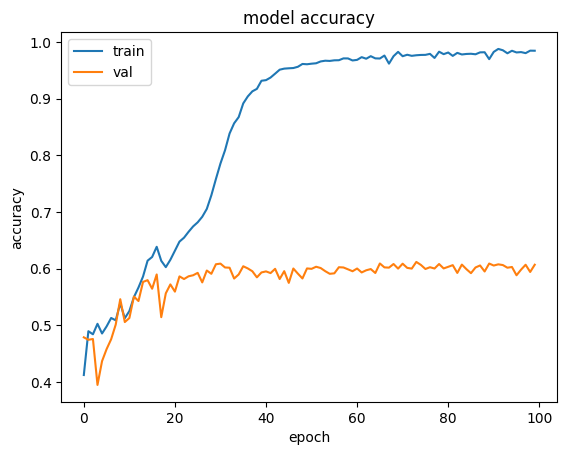

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('cnn_accuracy_plot.png')
plt.show()


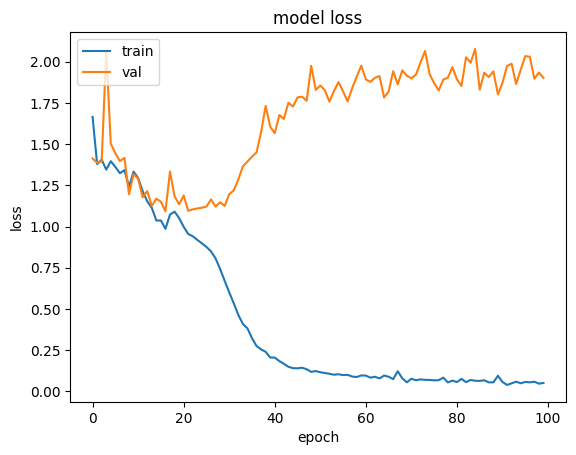

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('cnn_loss_plot.png')
plt.show()

In [25]:
import json

with open('class_labels.json', 'w') as fp:
    json.dump(train_datagen.class_indices, fp)